# How to use `scivision`

In this notebook, we will:

1. Demonstrate using the scivision [Python API](https://scivision.readthedocs.io/en/latest/api.html) to load several pretrained image classification models
2. Use the scivision catalog to find a matching dataset, which the model can be run on
3. Run the model on the data, performing simple model inference
4. Use the scivision catalog to find another model that can be run on the same dataset

First let's import some things from scivision: `default_catalog` is a scivision **catalog** that will let us discover models and datasets, and `load_pretrained_model` provides a convenient way to load and run a model.

In [1]:
from scivision import default_catalog, load_pretrained_model

## Inspecting our model in the scivision catalog

A scivision catalog is a collection of **models** and **datasources**.

For this example, we want to find datasources compatible with the model catalog entry "image-classifiers".  But first, let's use the catalog to retrive the "image-classifiers" repository url and take a look at the data contained in the *default catalog* (the built-in catalog, distributed as part of scivision) and see how this is structured.

In [12]:
# Get the model repo url
model_name = "" # add the name of the added model
models_catalog = default_catalog.models.to_dataframe()
model_repo = models_catalog[models_catalog.name == model_name].url.item()
model_repo # Why not paste the repo link into your browser and see how it looks?

FlexibleUrl('https://github.com/alan-turing-institute/scivision_classifier', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/scivision_classifier')

In [13]:
# Inspecting model entry and its metadata in the default catalog
models_catalog[models_catalog.name == model_name]

name description                        tasks  \
8  image-classifiers        None  (TaskEnum.classificiation,)   

                                                 url  \
8  https://github.com/alan-turing-institute/scivi...   

                                             pkg_url format  pretrained  \
8  git+https://github.com/alan-turing-institute/s...  image        True   

   labels_required               institution                         tags  
8            False  (alan-turing-institute,)  (classification, 2D, image)

## Loading the model

Some model entries in the scivision catalog contain a single loadable model. Here, let's load the "image-classifiers" entry, which contains each of the models in the [image-classifiers](https://pypi.org/project/image-classifiers/) package. We can do this with the `load_pretrained_model` function. We'll load 2 models (`resnet18` and `densenet121`).

Note: the "model" arg is not mandatory and will have a default value for any model catalog entries that have more than one model - for model catalog entries with a single model, this need not be set:

In [4]:
# Note: when loading this model repo for the first time you'll need to add the allow_install=True flag
butterfly_model = "efficientNetB3" # name given to the butterfly model

butterfly_model = load_pretrained_model(model_repo, model=butterfly_model)
#densenet_model = load_pretrained_model(model_repo, model='densenet121')

In [ ]:
!pip install -e git+https://github.com/alan-turing-institute/scivision_classifier@main#egg=scivision_classifier

In [5]:
# let's explore one of the model objects
resnet_model

scivision.PretrainedModel( 
  module='scivision_classifier', 
  model='resnet18', 
  source='https://github.com/alan-turing-institute/scivision_classifier' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

Later, we'll use these models to make predictions on image data found in the scivision catalog.

## Query the default scivision data catalog

Now let's use the `default_catalog` to identify datasources in the catalog that are compatible with our models (based on `tasks`, `format` and `labels_provided`/`labels_required`).

In [6]:
compatible_datasources = default_catalog.compatible_datasources("image-classifiers").to_dataframe()
compatible_datasources

name                                        description  \
2  data-002                                               None   
3  data-003                                              Koala   
4  data-004  Sample dataset of Plankton required to demonst...   
5  data-005  Sample dataset of satellite imagery required t...   

                                               tasks  labels_provided  \
2                         (TaskEnum.classificiation)             True   
3  (TaskEnum.object_detection, TaskEnum.classific...             True   
4                         (TaskEnum.classificiation)             True   
5  (TaskEnum.segmentation, TaskEnum.classificiation)            False   

                                         domains  \
2                                (oceanography,)   
3                             (computer-vision,)   
4                             (computer-vision,)   
5  (computer-vision, earth-observation, ecology)   

                                                 url format  \
2  https://github.com/scotthosking/intake-plankto...  image   
3  https://github.com/alan-turing-institute/scivi...  image   
4  https://raw.githubusercontent.com/alan-turing-...  image   
5  https://github.com/MartinSJRogers/VEdge_Detect...  image   

                                         institution  \
2                                           (CEFAS,)   
3                        (Wikipedia by Erik Veland,)   
4  (Centre for Environment, Fisheries and Aquacul...   
5                            (Cambridge University,)   

                                                tags  
2                                  (help-needed, 2D)  
3                                            (demo,)  
4     (2D, plankton, ecology, environmental-science)  
5  (2D, satellite, remote-sensing, ecology, envir...

Let's use `data-003`, an image dataset containing a single image of a Koala.

In [7]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-003']
target_datasource

name description                                              tasks  \
3  data-003       Koala  (TaskEnum.object_detection, TaskEnum.classific...   

   labels_provided             domains  \
3             True  (computer-vision,)   

                                                 url format  \
3  https://github.com/alan-turing-institute/scivi...  image   

                   institution     tags  
3  (Wikipedia by Erik Veland,)  (demo,)

## Load the dataset

Now let's load the dataset using the scivision python API, specifically the [load_dataset](https://scivision.readthedocs.io/en/latest/api.html#scivision.io.reader.load_dataset) function, which takes as input the url of the data repository (structured as per [this template](https://scivision.readthedocs.io/en/latest/data_repository_template.html)), which we can get from the target datasource:

In [18]:
from scivision import load_dataset

In [11]:
name = "" # insert dataset name once it is added to the catalog

target_datasource = default_catalog.datasources.to_dataframe()
target_datasource = target_datasource.loc[target_datasource['name'] == name]

target_datasource

name description                                              tasks  \
0  data-000        None  (TaskEnum.segmentation, TaskEnum.object_detect...   

   labels_provided                domains  \
0             True  (optical-microscopy,)   

                                                 url format institution  \
0  https://github.com/stardist/stardist/releases/...  image     (epfl,)   

                                                tags  
0  (help-needed, 3D, cell, cell-counting, biology...

In [16]:
data_url = target_datasource['url'].item()

The returned data config object of the`load_dataset` function is an "intake catalog". You can read our [documentation](https://scivision.readthedocs.io/en/latest/data_repository_template.html#data-config-file) to understand this better, but for now, let's inspect this config:

In [19]:
data_config = load_dataset(data_url)
data_config

FileNotFoundError: https://raw.githubusercontent.com/stardist/stardist/main/releases/download/0.3.0/demo3D.zip.scivision/data.yml

Clicking the `path` link to the location of this data config file online (in the dataset repo) reveals that there is one data source called `test_image`, and that the `intake_xarray.image.ImageSource` "intake driver" is being used. We can retrive the test image data in an image format which the model will accept, like so:

In [14]:
test_image = data_config.test_image().to_dask() # The xarray.DataArray is one format accepted by the our models
test_image

NameError: name 'data_config' is not defined

Let's take a look at the image with `matplotlib`:

In [12]:
import matplotlib.pyplot as plt

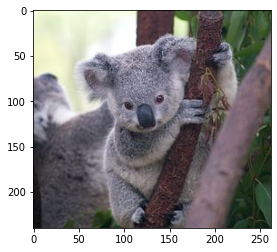

In [13]:
plt.imshow(test_image)

## Model predictions

Now let's use the loaded model on the test image data we found in the via catalog.

In [14]:
resnet_model.predict(test_image)

1/1 [==============================] - 0s 462ms/step


'koala : 99.78%'

In [15]:
densenet_model.predict(test_image)

1/1 [==============================] - 1s 1s/step


'koala : 99.73%'

As you can see, the models have given predictions for the test image, with a confidence score. Check out the code in the [model repo](https://github.com/alan-turing-institute/scivision_classifier) to see how this was determined!

## Query the default scivision model catalog

Using our test Koala image dataset, let's search the scivision default catalog for other models that can be used with it:

In [16]:
compatible_models = default_catalog.compatible_models("data-003").to_dataframe()
compatible_models

name  \
0                      model-000   
1                      model-001   
4          scivision-test-plugin   
5                mapreader-plant   
6             resnet50-plantkton   
8              image-classifiers   
9        huggingface-classifiers   
11  huggingface-object-detection   

                                          description  \
0                                                None   
1                                                None   
4                                                None   
5   automated detection of plant patches in images...   
6   automated classification of plankton images co...   
8                                                None   
9                                                None   
11                                               None   

                                                tasks  \
0   (TaskEnum.object_detection, TaskEnum.segmentat...   
1   (TaskEnum.segmentation, TaskEnum.thresholding,...   
4                        (TaskEnum.object_detection,)   
5   (TaskEnum.classificiation, TaskEnum.object_det...   
6                         (TaskEnum.classificiation,)   
8                         (TaskEnum.classificiation,)   
9                         (TaskEnum.classificiation,)   
11                       (TaskEnum.object_detection,)   

                                                  url  \
0                https://github.com/stardist/stardist   
1           https://github.com/danforthcenter/plantcv   
4   https://github.com/alan-turing-institute/scivi...   
5   https://github.com/alan-turing-institute/mapre...   
6   https://github.com/alan-turing-institute/plank...   
8   https://github.com/alan-turing-institute/scivi...   
9   https://github.com/alan-turing-institute/scivi...   
11  https://github.com/alan-turing-institute/scivi...   

                                              pkg_url format  pretrained  \
0   git+https://github.com/stardist/stardist.git@main  image        True   
1   git+https://github.com/danforthcenter/plantcv@...  image        True   
4   git+https://github.com/alan-turing-institute/s...  image        True   
5   git+https://github.com/alan-turing-institute/m...  image        True   
6   git+https://github.com/alan-turing-institute/p...  image        True   
8   git+https://github.com/alan-turing-institute/s...  image        True   
9   git+https://github.com/alan-turing-institute/s...  image        True   
11  git+https://github.com/alan-turing-institute/s...  image        True   

    labels_required                                        institution  \
0              True                                            (epfl,)   
1              True                                  (danforthcenter,)   
4             False                           (alan-turing-institute,)   
5             False                           (alan-turing-institute,)   
6             False  (alan-turing-institute, cefas, plankton-analyt...   
8             False                           (alan-turing-institute,)   
9             False               (alan-turing-institute, huggingface)   
11            False               (alan-turing-institute, huggingface)   

                                                 tags  
0   (2D, 3D, optical-microscopy, xray, microtomogr...  
1   (2D, hyperspectral, multispectral, near-infrar...  
4                                            (dummy,)  
5   (2D, plant, phenotype, rgb, biology, agriculture)  
6      (2D, plankton, ecology, environmental-science)  
8                         (classification, 2D, image)  
9                         (classification, 2D, image)  
11                                                 ()

The `huggingface-classifiers` catalog entry can be used to load some of the most popular image classification models from [Hugging Face](https://huggingface.co/models?pipeline_tag=image-classification&sort=downloads). See the list of included models in the [model repo](https://github.com/alan-turing-institute/scivision_huggingface). As before, let's load one of the named models and run it on our test image:

In [6]:
huggingface_repo = models_catalog[models_catalog.name == "huggingface-classifiers"].url.item()
microsoft_model = load_pretrained_model(huggingface_repo, model='microsoft_swin_tiny_patch4_window7_224', allow_install=True)

CalledProcessError: Command '['C:\\Users\\User\\anaconda3\\envs\\scivision\\python.exe', '-m', 'pip', 'install', '--force-reinstall', '--no-cache-dir', 'git+https://github.com/alan-turing-institute/scivision_huggingface@main#egg=scivision_huggingface']' returned non-zero exit status 1.

In [18]:
microsoft_model.predict(test_image)

'Predicted class: koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus'